In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist["data"], mnist["target"]
print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (70000, 784)
Y shape: (70000,)


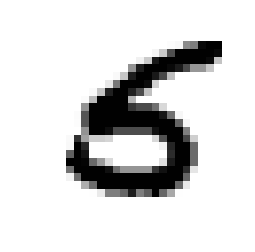

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[31001]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

plt.axis('off')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# shuffle the data
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [5]:
# binary classifier for the digit 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [6]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [7]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [8]:
y_pred = sgd_clf.predict(X_test)
n_correct = sum(y_pred == y_test_5)
print(n_correct/len(y_pred))

0.9514


In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.918  ,  0.96215,  0.9608 ])

In [10]:
from stupid_classifier import StupidClassifier

never_5_clf = StupidClassifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9106 ,  0.9094 ,  0.90895])

In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [12]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_train_5, y_train_pred)

In [13]:
tp = cf[1][1]
fp = cf[0][1]

precision = tp / (tp + fp)
print('Precision:', precision)

Precision: 0.677552314521


In [14]:
fn = cf[1][0]
recall = tp / (tp + fn)

print('Recall:', recall)

Recall: 0.788415421509


In [15]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.67755231452124287

In [16]:
recall_score(y_train_5, y_train_pred)

0.78841542150894672

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.72879188336601575

In [18]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 354401.41684001])

In [19]:
threshold = 300000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True], dtype=bool)

In [20]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [21]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

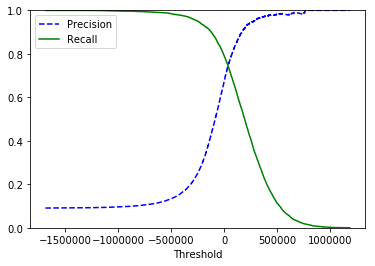

In [22]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

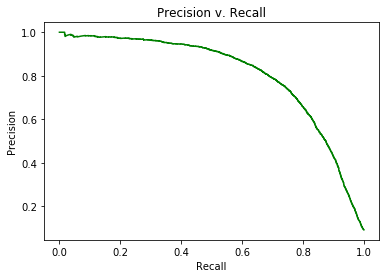

In [23]:
plt.plot(recalls[:-1], precisions[:-1], "g-")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision v. Recall')

In [24]:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_5, y_train_pred_90)

0.79579707068562933

In [25]:
recall_score(y_train_5, y_train_pred_90)

0.69156982106622389

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

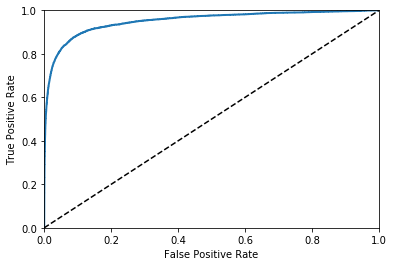

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()
    

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.95121984852954988

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [30]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, threhold_forest = roc_curve(y_train_5, y_scores_forest)


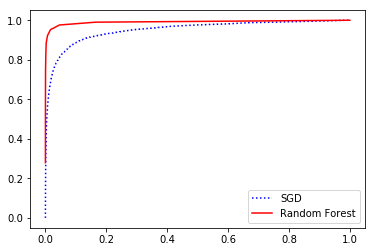

In [31]:
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, "r-", label="Random Forest")
plt.legend(loc="lower right")
plt.show()

In [32]:
roc_auc_score(y_train_5, y_scores_forest)

0.99128582668876242

In [33]:
y_forest_bin = (y_scores_forest > 0.5)
precision_score(y_train_5, y_forest_bin)

0.98398420359806937

In [34]:
recall_score(y_train_5, y_forest_bin)

0.82733812949640284

In [35]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [37]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -575616.51469009,  -701130.14547324,  -808107.46162099,
         -324078.59619788,  -188848.72073555,   354401.41684001,
         -297224.05673246, -1344265.98192571,  -598760.04868839,
         -830367.73152401]])

In [38]:
np.argmax(some_digit_scores)

5

In [40]:
sgd_clf.classes_[5]

5.0

In [42]:
# one vs. one
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [44]:
len(ovo_clf.estimators_)

45

In [45]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [46]:
forest_clf.predict_proba([some_digit])

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

In [47]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.87732454,  0.84469223,  0.88023203])

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.91011798,  0.91284564,  0.906686  ])

In [53]:
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.93886223,  0.9419971 ,  0.94179127])

In [54]:
y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5811,    2,   12,   10,    6,   12,   31,    3,   33,    3],
       [   2, 6630,   39,   18,   13,    8,    5,   13,   10,    4],
       [  45,   26, 5639,   44,   51,   13,   36,   36,   50,   18],
       [  26,   23,  146, 5639,    5,  107,   10,   59,   84,   32],
       [  16,   14,   24,   11, 5547,   12,   29,   24,   27,  138],
       [  50,   19,   27,  193,   28, 4956,   55,    7,   43,   43],
       [  50,    9,   26,    3,   37,   62, 5714,    0,   17,    0],
       [  17,   33,   90,   26,   68,    5,    3, 5902,   18,  103],
       [  33,   59,  101,  134,   50,  109,   39,   21, 5238,   67],
       [  36,   16,   31,   86,  191,   45,   14,  103,   50, 5377]])

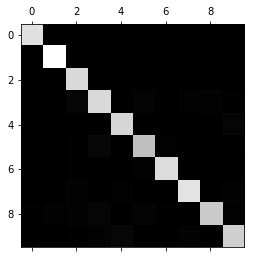

In [57]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [58]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

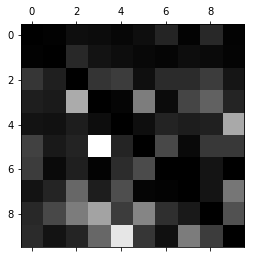

In [59]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()